<div class="alert alert-success">
    <b>Read before running this .ipynb file</b>:
     <ul>
      <li>
      In order to run this file successfully, you should:
     <ul>
      <li>
      Go to this link: https://github.com/chechen0904/NLP-Final-Project
      </li>
      <li>
      Download ZIP
      </li>
      <li>
      Unzip and run this file with the "Code" folder
      </li>    
    </ul>
</div>

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

In [2]:
inputdir = "../Data/"

<div class="alert alert-success">
    <b>Data source</b>:
     <ul>
      <li>
      This data was downloaded from Kaggle. There are three csv data and what I used is `Datafiniti_Hotel_Reviews.csv`.
      </li>
      <li>
      The data I used is a list of 1,000 hotels and their reviews provided by Datafiniti's Business Database. The most important variables in this dataset for me are the ratings and reviews from customers.
      </li>
      <li>
      Link: https://www.kaggle.com/datasets/datafiniti/hotel-reviews
      </li>    
    </ul>
</div>

In [3]:
hotel_data = pd.read_csv(inputdir + "Datafiniti_Hotel_Reviews.csv", encoding ='utf-8')

In [4]:
hotel_data.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


# Data visualization

<div class="alert alert-success">
    <b>Data description</b>:
     <ul>
      <li>
      The following data visualization graphs allow us to understand the variables contained in the data, whether there are any missing values, and the distribution of the variable values.
      </li>
      <li>
      From the following first graph, we can find that the data contains the hotel information such as hotel address, category, customer's rating and reviews etc. Among them, "reviews.userCity" and "reviews.userProvince" exist a large number of missing values.
      </li>
      <li>
      The following second graph is related with one of my most interested variables: hotel's rating from the customers. We can clearly observe that the scores are mostly concentrated in integer points: 1.0, 2.0, 3.0, 4.0 and 5.0, where most of the ratings scored by customers fell on 4.0 and 5.0.
      </li>
      <li>
      In the "Generate variables" part, there is also a data description for the newly generated variables.
      </li>         
    </ul>
</div>

<AxesSubplot:>

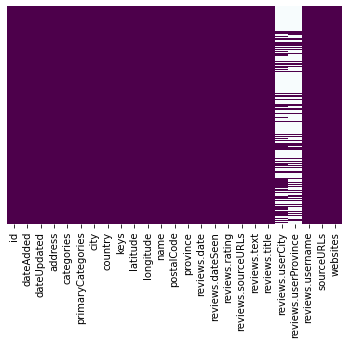

In [5]:
#Data visualization for the missing values
sns.heatmap(hotel_data.isnull(), yticklabels=False, cbar=False, cmap='BuPu_r')

<AxesSubplot:xlabel='reviews.rating', ylabel='count'>

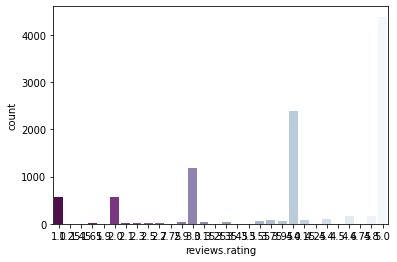

In [6]:
#Check the distribution of rating
sns.set_style(None)
sns.countplot(x = 'reviews.rating', data = hotel_data, palette = 'BuPu_r')

# Data cleaning

<div class="alert alert-success">
    <b>Clean the data</b>:
     <ul>
      <li>
      Since I used "utf-8" when importing the data, then there are no wrongly encoded issues within the data.
      </li>
      <li>
      Deal with missing values.
      </li>
      <li>
      Generate variables.
      </li>        
    </ul>
</div>

## Missing values

<div class="alert alert-success">
    <b>Deal with missing values</b>:
     <ul>
      <li>
      In the previous data visualization part we learned that the variables "reviews.userCity" and "reviews.userProvince" contain a large number of missing values. My approach is to delete these two variables. Normally it is not recommended to delete variables directly, but since I was sure I didn't need to use them, then I chose to delete them.
      </li>
      <li>
      However, we could also found that both "reviews.text" and "reviews.title" have one missing value, and the missing values are too small to be visualized in the previous data visualization part. My solution was to fill in the text with "Missing" at the place of missing value. Since there are so few missing values, this approach does not affect the results of Naive Bayes and Logistic regression later.
      </li>       
    </ul>
</div>

In [7]:
#Check which variable contains missing values and how many missing values in the variables
hotel_data.isna().sum()

id                         0
dateAdded                  0
dateUpdated                0
address                    0
categories                 0
primaryCategories          0
city                       0
country                    0
keys                       0
latitude                   0
longitude                  0
name                       0
postalCode                 0
province                   0
reviews.date               0
reviews.dateSeen           0
reviews.rating             0
reviews.sourceURLs         0
reviews.text               1
reviews.title              1
reviews.userCity        5836
reviews.userProvince    7295
reviews.username           0
sourceURLs                 0
websites                   0
dtype: int64

In [8]:
#Delete these two variable since I don't need to use them
del hotel_data["reviews.userCity"]
del hotel_data["reviews.userProvince"]

In [9]:
#Fill the missing values with text
hotel_data["reviews.text"] = hotel_data["reviews.text"].fillna("Missing")
hotel_data["reviews.title"] = hotel_data["reviews.title"].fillna("Missing")

In [10]:
#Ensure that the data no longer contains missing values
hotel_data.isna().sum()

id                    0
dateAdded             0
dateUpdated           0
address               0
categories            0
primaryCategories     0
city                  0
country               0
keys                  0
latitude              0
longitude             0
name                  0
postalCode            0
province              0
reviews.date          0
reviews.dateSeen      0
reviews.rating        0
reviews.sourceURLs    0
reviews.text          0
reviews.title         0
reviews.username      0
sourceURLs            0
websites              0
dtype: int64

## Generate variables

<div class="alert alert-success">
    <b>Generate the needed variables</b>:
     <ul>
      <li>
      Generating key variable: In order to use the Naive Bayes method, I need to convert the value of the "reviews.rating" variable, which I defined: 
      <ul>
      <li>If the customer's rating is below 3.5, the customer's attitude towards the hotel is considered negative;</li> 
      <li>If the rating is between 3.5 and 4.5, the attitude is considered neutral;</li> 
      <li>If the rating is higher than 4.5 - Congratulations! The attitude of the customer is sooooo positive and they thought the hotel is really excellent!</li>
      </ul>
      </li>
    </ul>
</div>         

<div class="alert alert-success">
    <b>Data description of the generated variables</b>:
     <ul>         
      <li>
      The most frequent reviews were positive, while there is not a large difference between the number of negative and neutral reviews.
      </li>
      <li>
      After generating the variable for customer review's length, we can find through data visualization that: whether the reviews are negative, neutral or positive, the majority of these reviews are between 200-400 words.
      </li>        
    </ul>
</div>

In [11]:
hotel_data["reviews.rating"].value_counts()

5.00    4384
4.00    2397
3.00    1187
1.00     572
2.00     561
4.80     162
4.60     155
4.40     102
3.75      91
4.15      78
3.95      52
3.55      50
3.35      40
3.15      37
2.90      34
2.70      23
2.50      19
2.30      12
2.10      11
1.65       8
1.45       6
1.90       4
4.50       4
3.50       2
4.25       2
1.25       2
3.25       2
2.75       1
3.45       1
4.75       1
Name: reviews.rating, dtype: int64

In [12]:
#Generate the variable I needed for Naive Bayes
hotel_data['reviews.attitude'] = np.where(hotel_data['reviews.rating'] < 3.5, "negative", hotel_data['reviews.rating'])
hotel_data['reviews.attitude'] = np.where((hotel_data['reviews.rating'] >= 3.5) & (hotel_data['reviews.rating'] < 4.5), 
                                          "neutral", hotel_data['reviews.attitude'])
hotel_data['reviews.attitude'] = np.where(hotel_data['reviews.rating'] >= 4.5, "positive", hotel_data['reviews.attitude'])

In [13]:
hotel_data['reviews.attitude']

0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
9995    negative
9996     neutral
9997     neutral
9998    negative
9999    negative
Name: reviews.attitude, Length: 10000, dtype: object

In [14]:
#Pick out the variables needed for Naive Bayes and form new data
reviews_data = hotel_data.loc[:, ['reviews.attitude', 'reviews.text']]

In [15]:
reviews_data.head()

,reviews.attitude,reviews.text
0,positive,Our experience at Rancho Valencia was absolute...
1,positive,Amazing place. Everyone was extremely warm and...
2,positive,We booked a 3 night stay at Rancho Valencia to...
3,negative,Currently in bed writing this for the past hr ...
4,positive,I live in Md and the Aloft is my Home away fro...


In [16]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   reviews.attitude  10000 non-null  object
 1   reviews.text      10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [17]:
reviews_data.describe()

,reviews.attitude,reviews.text
count,10000,10000
unique,3,9982
top,positive,Great
freq,4706,6


In [18]:
reviews_data.groupby('reviews.attitude').describe()

reviews.text         \
                        count unique   
reviews.attitude                       
negative                 2520   2518   
neutral                  2774   2773   
positive                 4706   4697   

                                                                          
                                                                top freq  
reviews.attitude                                                          
negative          Bad: Nothing. Good: Convenient location in the...    2  
neutral           Bad: The restaurant was less the expected. Foo...    2  
positive                                                      Great    5

In [19]:
reviews_data['length'] = reviews_data['reviews.text'].apply(len)

In [20]:
reviews_data['length'].describe()

count    10000.000000
mean       324.581300
std        295.400464
min          1.000000
25%        201.000000
50%        298.000000
75%        344.000000
max       5939.000000
Name: length, dtype: float64

array([[<AxesSubplot:title={'center':'negative'}>,
        <AxesSubplot:title={'center':'neutral'}>],
       [<AxesSubplot:title={'center':'positive'}>, <AxesSubplot:>]],
      dtype=object)

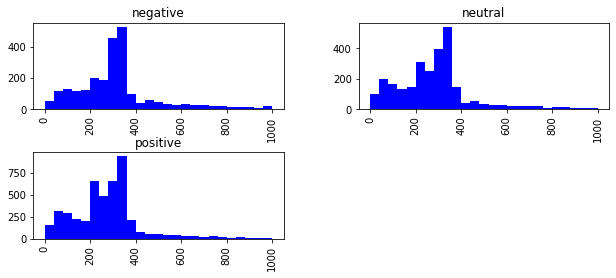

In [21]:
#Data visualization for key variable
reviews_data.hist(column='length', by='reviews.attitude',color='blue', bins=25, figsize=(10,4), range=[0, 1000])

## Text preprocessing

<div class="alert alert-success">
    <b>Pre-process the text</b>:
     <ul>
      <li>
      In this part, the method I use is the bag-of-words (BOW) method. The BOW method is able to convert a sentence into a vector to present without considering the order of the words in the sentence, but only the frequency of the words' occurrences in the vocabulary in this sentence. Although this method has disadvantages such as not reflecting the association between words, the BOW method is very easy to understand and implement, which is the main reason why I chose it.
      <li>
      During text pre-processing, I:
      <ul>
      <li>1. Tokenization: Splits a sentence or a paragraph into single words and punctuation. A word is the smallest unit that expresses the complete meaning, and after tokenization, the unstructured text data can be converted into structured data.</li> 
      <li>2. The numeric characters, punctuation, and stopwords are removed, mainly because they do not provide useful information, and removing these noises facilitates us to perform better calculations and fits.</li> 
      <li>3. In addition, since English words are different from upper and lower case, I converted the upper case to lower case, which can reduce the number of words.</li>
      </ul>
      </li>
     <li>
      I did not use lemmatize or stem the tokens, it makes sense to use them when there are many documents and the vocabularies are large, so the feature matrix is a huge sparse matrix in this case and then the dimensions need to be reduced. But the text data I used was not really large, so those methods were not used. Also, I did not use bigrams, n-ngram (n > 2), etc., because although they preserve the order of words, the vocabulary table will be inflated at the same time.
      </li>     
    </ul>
</div>  

In [22]:
stopwords = stopwords.words('english')

In [23]:
def remove_punct_tokenize(text):
    text = re.sub(r'[^\w\s]','', text)
    text = text.lower()   
    return text.split()

In [24]:
def remove_stopwords(text):
    clean_stopwords = ""
    for element in remove_punct_tokenize(text):
        if element not in stopwords:
            clean_stopwords = clean_stopwords + " "+ element
    return clean_stopwords.strip()

In [25]:
reviews_data['reviews.text'].apply(remove_stopwords).head()

0    experience rancho valencia absolutely perfect ...
1    amazing place everyone extremely warm welcomin...
2    booked 3 night stay rancho valencia play tenni...
3    currently bed writing past hr 12 dogs barking ...
4    live md aloft home away homewe stayed 1 night ...
Name: reviews.text, dtype: object

In [26]:
bow_transformer = CountVectorizer()

In [27]:
bow_transformer = CountVectorizer(preprocessor = remove_stopwords).fit(reviews_data['reviews.text'])

In [28]:
bow_transformer

CountVectorizer(preprocessor=<function remove_stopwords at 0x7fd96a69c9d0>)

In [29]:
print (len(bow_transformer.vocabulary_))

19641


In [30]:
data_bow = bow_transformer.transform(reviews_data['reviews.text'])

In [31]:
tfidf_transformer = TfidfTransformer().fit(data_bow)

In [32]:
data_tfidf = tfidf_transformer.transform(data_bow)
print (data_tfidf.shape)

(10000, 19641)


# Methods Implementation

<div class="alert alert-success">
    <b>Implement the algorithms</b>:
     <ul>
      <li>
      In the NLP final project, I used two algorithms:
      <ul>
      <li>1. Naive Bayes. The Naive Bayes is a classification method based on Bayes' theorem and the assumption of conditional independence of features. The features of this algorithm are the combination of prior and posterior probabilities, and the assumption that all appears of features are independent of each other and each feature is equally important.</li> 
      <li>2. Logistic regression. Logistic regression is a machine learning method used to solve dichotomous problems and is used to estimate the probability. The feature of this algorithm is that it is not a regression algorithm that needs to predict continuous outcomes; logistic regression is not algorithm for regression but for classification.</li> 
      </ul>
      </li>
     <li>
      Advantages and disadvantages of the algorithms:
      <ul>
      <li>
      Naive Bayes:
      <ul>
      <li>
      Advantages: the algorithm shows high accuracy with large data sets; it is less sensitive for missing values, the algorithm is simple and often used for text classification...
      </li> 
      <li>
      Disadvantages: Due to the assumption of independence, it does not work well if the sample features are correlated...
      </li> 
      </ul>
      </li> 
      <li>
      Logistic regression:
      <ul>
      <li>
      Advantages: high interpretability; easy and efficient for implementation...
      </li> 
      <li>
      Disadvantages: bad performance when the feature space is large; under-fitting easily, low accuracy...
      </li> 
      </ul>
      </li>
      <li>
      Please note that the above mentioned are only part of the advantages and disadvantages of the algorithms. The reason for choosing these two algorithms is also mainly because my final project is related to the classification problem, so I chose these two common and simple classification algorithms.
      </li>
    </ul>          
</div>  

<div class="alert alert-success">
    <b>My findings for the two algorithms</b>:
     <ul>
      <li>
      Viewing my following interpretation for the classification report of Naive Bayes Classifier, it is clear that although lots of people said "Naive Bayes Classifier performs very well with text data", the overall prediction accuracy in the classification report is not high (in this project), but only 56%. It is also important to note that the recall rate of neutral classification is very low, close to 0, implying only 3% of the samples that are truly neutral are accurately predicted, which is really bad.
      </li>
      <li>
      From my following interpretation of the classification report of logistic regression, it is clear that logistic regression has a more balanced performance in predicting the three types of hotel reviews (although the precision and recall rate of neutral review prediction is still lower compared with the other two types of reviews) and a higher accuracy rate (64%).
      </li>
      <li>
      In my final project, after examining the classification reports of the two methods and my interpretations, it's easy to found that Logistic regression has a higher accuracy (64% > 56%), indicating that Logistic regression performs better than Naive Bayes in prediction, so I would choose the Logistic regression. If the step of stemming the tokens is added to the text pre-processing, I expect the accuracy of both methods will improve, but the improvement is not large.
      </li>        
    </ul>
</div>

## Naive Bayes Classifier

In [33]:
reviews_attitude_detect_model = MultinomialNB().fit(data_tfidf , reviews_data['reviews.attitude'])

In [34]:
all_predictions = reviews_attitude_detect_model.predict(data_tfidf)
print(all_predictions)

['positive' 'positive' 'positive' ... 'neutral' 'negative' 'negative']


In [35]:
true_val = reviews_data['reviews.attitude']
print (true_val)

0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
9995    negative
9996     neutral
9997     neutral
9998    negative
9999    negative
Name: reviews.attitude, Length: 10000, dtype: object


In [36]:
print(classification_report(reviews_data['reviews.attitude'], all_predictions))

              precision    recall  f1-score   support

    negative       0.92      0.58      0.71      2520
     neutral       0.90      0.12      0.22      2774
    positive       0.58      1.00      0.74      4706

    accuracy                           0.65     10000
   macro avg       0.80      0.57      0.55     10000
weighted avg       0.76      0.65      0.58     10000



In [37]:
text_train, text_test, attitude_train, attitude_test = train_test_split(reviews_data['reviews.text'], 
                                                                        reviews_data['reviews.attitude'], 
                                                                        test_size=0.2, random_state=1)

In [38]:
#Create pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor = remove_stopwords)),  #Integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  #Naive Bayes classifier
])

In [39]:
#Now we can directly pass message text data and the pipeline will do our pre-processing for us!
pipeline.fit(text_train, attitude_train)
predictions = pipeline.predict(text_test)

<div class="alert alert-success">
    <b>For classification report</b>:
     <ul>         
      <li>
      precision: The proportion of samples with positive (negative) predictions that are truly positive (negative).
      </li>
      <li>
      recall: The focus is on how many of the samples that are true positive (negative) are accurately predicted.
      </li>  
      <li>
      f1-score: The mean value of both.
      </li>
      <li>
      support: The number of occurrences of each label.
      </li>  
      <li>
      accuracy: The ratio of the number of correctly classified samples to the number of all classified samples.
      </li> 
      <li>
      macro avg: The arithmetic average of the f1-score values of all classes (let β= 1).
      </li> 
      <li>
      weighted avg: The ratio of each category sample number to the total number of samples in all categories as the weight.
      </li>          
    </ul>
</div>

In [40]:
print (classification_report(attitude_test, predictions))

              precision    recall  f1-score   support

    negative       0.86      0.42      0.57       495
     neutral       0.60      0.03      0.05       597
    positive       0.52      0.98      0.68       908

    accuracy                           0.56      2000
   macro avg       0.66      0.48      0.43      2000
weighted avg       0.63      0.56      0.46      2000



<div class="alert alert-success">
    <b>Interpret the results of classification report</b>:
     <ul>         
      <li>
      For the negative class:
      <ul>         
      <li>
      precision is 0.86, means that 86% of the samples predicted to be negative are truly negative.
      </li>
      <li>
      recall is 0.42, means that 42% of the samples that are truly negative are accurately predicted.
      </li>          
      </ul> 
      <li>
      For the neutral class:
      <ul>         
      <li>
      precision is 0.60, means that 60% of the samples predicted to be neutral are truly neutral.
      </li>
      <li>
      recall is 0.03, means that 3% of the samples that are truly neutral are accurately predicted.
      </li>          
      </ul>
      <li>
      For the positive class:
      <ul>         
      <li>
      precision is 0.52, means that 52% of the samples predicted to be positive are truly positive.
      </li>
      <li>
      recall is 0.98, means that 98% of the samples that are truly positive are accurately predicted.
      </li>          
      </ul>
      </li>
      <li>   
      accuracy = 0.56, means that the number of correctly classified samples accounts for 56% of all classified samples. 
      </li>          
    </ul>
</div>

In [41]:
confusion_matrix(attitude_test, predictions)

array([[210,   6, 279],
       [ 22,  15, 560],
       [ 11,   4, 893]])

In [42]:
#Predict some messages
pipeline.predict(["I think this hotel is wonderful"])

array(['positive'], dtype='<U8')

In [43]:
pipeline.predict(["Horrible hotel"])

array(['negative'], dtype='<U8')

In [44]:
pipeline.predict(["Just so so. Poor: awful service; Good: close to downtown."])

array(['neutral'], dtype='<U8')

## Logistic Regression

In [45]:
#Generate the variable I needed for Logistic-regression
hotel_data['reviews.attitude'] = np.where(hotel_data['reviews.rating'] < 3.5, -1, hotel_data['reviews.rating'])
hotel_data['reviews.attitude'] = np.where((hotel_data['reviews.rating'] >= 3.5) & (hotel_data['reviews.rating'] < 4.5), 
                                          0, hotel_data['reviews.attitude'])
hotel_data['reviews.attitude'] = np.where(hotel_data['reviews.rating'] >= 4.5, 1, hotel_data['reviews.attitude'])

In [46]:
hotel_data['reviews.attitude']

0       1.0
1       1.0
2       1.0
3      -1.0
4       1.0
       ... 
9995   -1.0
9996    0.0
9997    0.0
9998   -1.0
9999   -1.0
Name: reviews.attitude, Length: 10000, dtype: float64

In [47]:
#Pick out the variables needed for Logistic regression and form new data
reviews_data = hotel_data.loc[:, ['id', 'country', 'reviews.username', 'reviews.attitude', 'reviews.text']]

In [48]:
X = reviews_data.drop(columns='reviews.attitude', axis=1)
y = reviews_data['reviews.attitude']

In [49]:
reviews_data['reviews.text'] = reviews_data['reviews.text'].apply(remove_stopwords)

In [50]:
X = reviews_data['reviews.text'].values
y = reviews_data['reviews.attitude'].values

In [51]:
print(X)

['experience rancho valencia absolutely perfect beginning end felt special happy stayed would come back heart beat'
 'amazing place everyone extremely warm welcoming weve stayed top notch places definitely top 2 great romantic getaway take kids along couple stuffed animals waiting girls upon arrival cant wait go back'
 'booked 3 night stay rancho valencia play tennis since one highest rated tennis resorts america place really top luxury standpoint overall experience villas really perfect staff great attention details includes fresh squeezed orange juice morning restaurants bar room service amazing tennis program really impressive well want come back'
 ...
 'rolled 1130 laid heads woke continental breakfast rolled daybreak construction heat done far beautiful nice updated pool area older motel staff super nice'
 'absolutely terriblei told given non smoking room walked smelled smoke ash tray sitting table checked late smoke miserablechecking type police parking lot pulling people walking

In [52]:
print(y)

[ 1.  1.  1. ...  0. -1. -1.]


In [53]:
y.shape

(10000,)

In [54]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [55]:
seed = 318
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed, stratify = y)

In [56]:
y

array([ 1.,  1.,  1., ...,  0., -1., -1.])

### Prediction

In [57]:
logreg = LogisticRegression()

In [58]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [59]:
predictions = logreg.predict(X_test)

In [60]:
predictions

array([1., 1., 1., ..., 1., 0., 0.])

### Evaluation

In [61]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        -1.0       0.74      0.69      0.71       756
         0.0       0.45      0.32      0.37       832
         1.0       0.67      0.81      0.73      1412

    accuracy                           0.64      3000
   macro avg       0.62      0.60      0.61      3000
weighted avg       0.63      0.64      0.63      3000



<div class="alert alert-success">
    <b>Interpret the results of classification report</b>:
     <ul>         
      <li>
      For the negative (-1.0) class:
      <ul>         
      <li>
      precision is 0.74, means that 74% of the samples predicted to be negative are truly negative.
      </li>
      <li>
      recall is 0.69, means that 69% of the samples that are truly negative are accurately predicted.
      </li>          
      </ul> 
      <li>
      For the neutral (0.0) class:
      <ul>         
      <li>
      precision is 0.45, means that 45% of the samples predicted to be neutral are truly neutral.
      </li>
      <li>
      recall is 0.32, means that 32% of the samples that are truly neutral are accurately predicted.
      </li>          
      </ul>
      <li>
      For the positive (1.0) class:
      <ul>         
      <li>
      precision is 0.67, means that 67% of the samples predicted to be positive are truly positive.
      </li>
      <li>
      recall is 0.81, means that 81% of the samples that are truly positive are accurately predicted.
      </li>          
      </ul>
      </li>
      <li>   
      accuracy = 0.64, means that the number of correctly classified samples accounts for 64% of all classified samples. 
      </li>          
    </ul>
</div>

In [62]:
print(confusion_matrix(y_test, predictions))

[[ 518  121  117]
 [ 121  267  444]
 [  62  208 1142]]


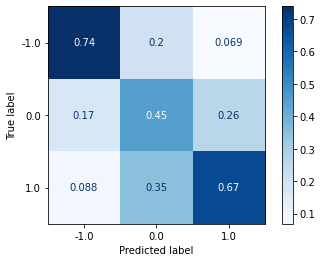

In [63]:
plot_confusion_matrix(logreg, X_test, y_test, cmap = plt.cm.Blues, normalize = 'pred')

In [64]:
dummy_clf = DummyClassifier(strategy = "most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_test)

array([1., 1., 1., ..., 1., 1., 1.])

In [65]:
print(classification_report(y_test, dummy_clf.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       756
         0.0       0.00      0.00      0.00       832
         1.0       0.47      1.00      0.64      1412

    accuracy                           0.47      3000
   macro avg       0.16      0.33      0.21      3000
weighted avg       0.22      0.47      0.30      3000



/Users/chenche/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chenche/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chenche/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
dummy_clf.score(y_test, dummy_clf.predict(X_test))

1.0

In [67]:
dummy_clf.score(y_test, logreg.predict(X_test))

0.5676666666666667